<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Sonya's Reading List from 2021 to Present</p>

In [1]:
# IMPORT NECESSARY PACKAGES
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sqlite3 import connect

# from __future__ import unicode_literals
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [2]:
# Define Function to calculate the number of days in a year
def days_in_year(year):
        """Returns the number of days in a given year.
    >>> days_in_year(2020)
    366
    """
        if year % 4 == 0:
            if year % 100 == 0:
                if year % 400 == 0:
                    return 366
                else:
                    return 365
            else:
                return 366
        else:
            return 365
help(days_in_year)

Help on function days_in_year in module __main__:

days_in_year(year)
    Returns the number of days in a given year.
    >>> days_in_year(2020)
    366



In [3]:
# Define functions to standardize words in word cloud
def clean_text(text):
    """Remove symbols, trailing whitespaces and anything in parentheses (including the parentheses)
    >>> clean_text("Hello! This is a sample text (with some extra info).")
    Hello This is a sample text
    """
    text = re.sub(r'\([^)]*\)', '', text)
    cleaned_text = re.sub(r'[^\w\s]', '', text).replace("  ", " ").strip()
    return cleaned_text
help(clean_text)

def remove_stopwords(text):
    """Tokenize text and Remove English stop words
    >>> remove_stopwords("This is a sample text, with some common words.")
    sample text common words
    """
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text
help(remove_stopwords)

Help on function clean_text in module __main__:

clean_text(text)
    Remove symbols, trailing whitespaces and anything in parentheses (including the parentheses)
    >>> clean_text("Hello! This is a sample text (with some extra info).")
    Hello This is a sample text

Help on function remove_stopwords in module __main__:

remove_stopwords(text)
    Tokenize text and Remove English stop words
    >>> remove_stopwords("This is a sample text, with some common words.")
    sample text common words



In [4]:
# Create a messagebox template for styling
def msgbox(text):
    """Returns a small message box within which text can be displayed
    >>> msgbox("Hello, World!")
    ╔══════════════════════════════════════╗
    ║          Hello, World!               ║
    ╚══════════════════════════════════════╝
    """
    # Find the maximum line length in the text
    max_line_length = max(len(line) for line in text.split("\n")) + 8

    # Create the top border of the box
    top_border = "╔" + "═" * (max_line_length + 2) + "╗"

    # Create the bottom border of the box
    bottom_border = "╚" + "═" * (max_line_length + 2) + "╝"

    # Create the lines of text inside the box
    text_lines = text.split("\n")
    formatted_lines = ["║ " + line.center(max_line_length) + " ║" for line in text_lines]

    # Combine all the components to create the boxed text
    boxed_text = "\n".join([top_border] + formatted_lines + [bottom_border])
    
    # show the output
    print(boxed_text)
help(msgbox)

Help on function msgbox in module __main__:

msgbox(text)
    Returns a small message box within which text can be displayed
    >>> msgbox("Hello, World!")
    ╔══════════════════════════════════════╗
    ║          Hello, World!               ║
    ╚══════════════════════════════════════╝



<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2021</p>

In [5]:
book_list2021 = {1:{'Name':"The richest man in Babylon", 'Author':"George S. Clason", 'Pages':224, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 2:{'Name':"The slight edge: Turning simple disciplines into massive success & happiness", 'Author':"Jeff Olson", 'Pages':280, 'Format': "Print", 'Platform':"Amazon"}
                 , 3:{'Name':"Intermittent fasting basics: Your guide to the essentials of intermittent fasting - and how it can work for you!", 'Author':"Lindsay Boyers", 'Pages':219, 'Format': "Print", 'Platform':"Gift"}
                 , 4:{'Name':"The one thing: The surprisingly simple truth behind extraordinary results", 'Author':"Gary Keller", 'Pages':240, 'Format': "Print", 'Platform':"Google Drive"}
                 , 5:{'Name':"Who moved my cheese: An A-Mazing way to deal with change in your work and in your life", 'Author':"Spencer Johnson", 'Pages':94, 'Format': "Print", 'Platform':"Ebay"}
                 , 6:{'Name':"Think and grow rich", 'Author':"Napoleon Hill", 'Pages':290, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 7:{'Name':"Outwitting the devil: The secret to freedom and success", 'Author':"Napoleon Hill", 'Pages':302, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 8:{'Name':"The four agreements: a practical guide to personal freedom", 'Author':"Don Miquel Ruiz", 'Pages':140, 'Format': "Print", 'Platform':"Amazon"}
                 , 9:{'Name':"Atomic habits: an easy and proven way to build good habits and break bad ones", 'Author':"James Clear", 'Pages':298, 'Format': "Print", 'Platform':"Amazon"}
                 , 10:{'Name':"How to win friends and influence people", 'Author':"Dale Carnegie", 'Pages':250, 'Format': "Print", 'Platform':"Amazon"}
                 , 11:{'Name':"Trading in the zone: master the market with confidence, discipline and a winning attitude", 'Author':"Mark Douglas", 'Pages':207, 'Format': "Print", 'Platform':"Amazon"}
                 , 12:{'Name':"Stone soup", 'Author':"Marcia Brown", 'Pages':52, 'Format': "Print", 'Platform':"DiscoverBooks.com"}
                 , 13:{'Name':"Rich dad's cashflow quadrant: Guide to financial freedom", 'Author':"Robert T. Kiyosaki", 'Pages':282, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 14:{'Name':"A beginners guide to the stock market", 'Author':"Mathew R. Kratter", 'Pages':100, 'Format': "Ebook", 'Platform':"Amazon Prime"}
                 , 15:{'Name':"Credit spread options for beginners: turn your most boring stocks into reliable monthly paychecks using call, put & iron butterfly spreads - even if the market is doing nothing", 'Author':"Freeman Publications", 'Pages':134, 'Format': "Ebook", 'Platform':"Amazon Prime"}
                 , 16:{'Name':"Heart sick: Connecting the dots between hope, disappointment and healing", 'Author':"Conscious Core", 'Pages':107, 'Format': "Ebook", 'Platform':"Kindle"}
                 , 17:{'Name':"Thinking strategically: the competitive edge in business, politics and everyday life", 'Author':"Avinash K. Dixit & " "Barry J. Nalebuff", 'Pages':384, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 18:{'Name':"Noise trading and illusory corrections in the US equity markets", 'Author':"Jennifer C. Bender & " "Carol L. Osler & " "David Simon", 'Pages':47, 'Format': "Research Paper", 'Platform':"Google Drive"}
                }

In [6]:
BL21 = pd.DataFrame(book_list2021).transpose()
BL21

,Name,Author,Pages,Format,Platform
1,The richest man in Babylon,George S. Clason,224,Ebook,Google Drive
2,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print,Amazon
3,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print,Gift
4,The one thing: The surprisingly simple truth b...,Gary Keller,240,Print,Google Drive
5,Who moved my cheese: An A-Mazing way to deal w...,Spencer Johnson,94,Print,Ebay
6,Think and grow rich,Napoleon Hill,290,Ebook,Google Drive
7,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302,Ebook,Google Drive
8,The four agreements: a practical guide to pers...,Don Miquel Ruiz,140,Print,Amazon
9,Atomic habits: an easy and proven way to build...,James Clear,298,Print,Amazon
10,How to win friends and influence people,Dale Carnegie,250,Print,Amazon


In [7]:
pages_read21 = BL21['Pages'].sum()
msgbox("2021 reading stats".upper())
print(f"Number of books read in 2021: \t\t\t\t {BL21['Name'].count()} books read in 2021")
print(f"Number of pages read in 2021: \t\t\t\t {format(pages_read21, ',d')} total pages read")
print(f"Average number of pages read per month in 2021: \t {round(pages_read21/12)} pages read per month")
print(f"Average number of pages read per day in 2021: \t\t {round(pages_read21/days_in_year(2021))} pages read per day")

╔════════════════════════════╗
║     2021 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2021: 				 18 books read in 2021
Number of pages read in 2021: 				 3,650 total pages read
Average number of pages read per month in 2021: 	 304 pages read per month
Average number of pages read per day in 2021: 		 10 pages read per day


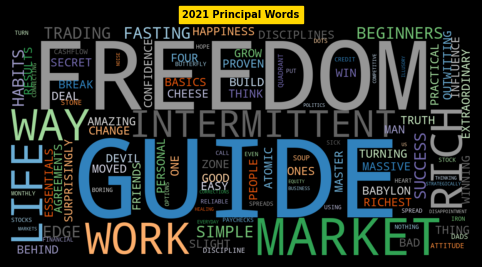

In [8]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL21['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("2021 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2022</p>

In [9]:
book_list2022 = {1:{'Name':"The subtle art of not giving a F*ck: A counterintuitive approach to living a good life", 'Author':"Mark Manson", 'Pages':206, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 2:{'Name':"Why we sleep; unlocking the power of sleep and dreams", 'Author':"Mathew Walker", 'Pages':323, 'Format': "Ebook", 'Platform':"Google Drive"}
                 , 3:{'Name':"Ingredients: the strange chemistry of what we put in and on us", 'Author':"Goerge Zaidan", 'Pages':299, 'Format': "Print", 'Platform':"Gift"}
                 , 4:{'Name':"We should all be millionaires: A woman's guide to earning more, building wealth, and gaining economic power", 'Author':"Rachel Rodgers", 'Pages':276, 'Format': "Ebook", 'Platform':"Amazon Prime"}
                 , 5:{'Name':"The five love languages: The secret to love that lasts", 'Author':"Gary Chapman", 'Pages':272, 'Format': "Audiobook", 'Platform':"Youtube"}
                 , 6:{'Name':"The art of saying NO: How to stand your ground, reclain your time and energy, and refuse to be taken for granted (Without feeling guilty)", 'Author':"Damon Zahariades", 'Pages':160, 'Format': "Ebook", 'Platform':"Amazon Prime"}
                 , 7:{'Name':"If you had controlling parents: How to make peace with your past and take your place in the world", 'Author':"Dan Neuharth", 'Pages':274, 'Format': "Ebook", 'Platform':"Kindle"}
                 , 8:{'Name':"Abundance beyond trauma: Discovering the courage for change and commitment to yourself", 'Author':"Jeannine L. Rashidi", 'Pages':169, 'Format': "Ebook", 'Platform':"Amazon Prime"}
                 , 9:{'Name':"Dear Girl, A celebration of wonderful, smart and beautiful you!", 'Author':"Amy Krouse Rosenthal & " "Paris Rosenthal", 'Pages':40, 'Format': "Print", 'Platform':"Amazon"}
                }

In [10]:
BL22 = pd.DataFrame(book_list2022).transpose()
BL22

,Name,Author,Pages,Format,Platform
1,The subtle art of not giving a F*ck: A counter...,Mark Manson,206,Ebook,Google Drive
2,Why we sleep; unlocking the power of sleep and...,Mathew Walker,323,Ebook,Google Drive
3,Ingredients: the strange chemistry of what we ...,Goerge Zaidan,299,Print,Gift
4,We should all be millionaires: A woman's guide...,Rachel Rodgers,276,Ebook,Amazon Prime
5,The five love languages: The secret to love th...,Gary Chapman,272,Audiobook,Youtube
6,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook,Amazon Prime
7,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook,Kindle
8,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,Amazon Prime
9,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print,Amazon


In [11]:
pages_read22 = BL22['Pages'].sum()
msgbox("2022 reading stats".upper())
print(f"Number of books read in 2022: \t\t\t\t {BL22['Name'].count()} books read in 2022")
print(f"Number of pages read in 2022: \t\t\t\t {format(pages_read22, ',d')} total pages read")
print(f"Average number of pages read per month in 2022: \t {round(pages_read22/12)} pages read per month")
print(f"Average number of pages read per day in 2022: \t\t {round(pages_read22/days_in_year(2022))} pages read per day")

╔════════════════════════════╗
║     2022 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2022: 				 9 books read in 2022
Number of pages read in 2022: 				 2,019 total pages read
Average number of pages read per month in 2022: 	 168 pages read per month
Average number of pages read per day in 2022: 		 6 pages read per day


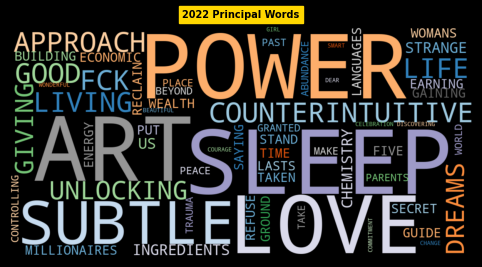

In [12]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL22['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='hamming')
plt.axis('off')
plt.title("2022 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2023</p>

In [13]:
book_list2023 = {"Name":[
      "The 7 habits of highly effective people: Powerful lessons in personal change"
     ,"Why your weirdness is wonderful: Embrace your quirks and live your strengths"
     ,"Be Quiet! (Mother Bruce Book 3)"
     ,"Red Riding Hood"
     ,"Storytelling with data: A visualization guide for business professionals"
     ,"Learning SQL: Generating, Manipulating and Retrieving Data"
     ,"Resonate: Present visual stories that transform audiences"
     ,"Deep Work: Rules for focused success in a distracted world"
     ,"The great gatsby"
     ,"Switch: How to change things when change is hard"
     ,"Rafiki the Chameleon"
     ,"The 4 hour work week: Escape the 9-5, live anywhere and join the new rich"
     ,"The declaration of independence and the constitution of the United States"
     ,"What makes the great great: strategies for extraordinary achievement"
     ,"Receiving healing through forgiveness: A guide to freedom"
     ,"Thinking, fast and slow"
     ,"The light we carry: Overcoming in uncertain times"
     ,"Better data visualizations: A guide for scholars, researchers and wonks"
     ,"Computing machinery and intelligence"
     ,"War is kind"
     ,"Margin: Restoring emotional, physical, financial and time reserves to overloaded lives"
     ]
                 , "Author": ["Stephen R. Covey"
                            ,"Laurie Wallin"
                            ,"Ryan T. Higgins"
                            ,"Lydia L. Very"
                            ,"Cole Nussbaumer Knaflic"
                            ,"Alan Beaulieu"
                            ,"Nancy Duarte"
                            ,"Cal Newport"
                            ,"F. Scott Fitzgerald"
                            ,"Chip Heath & Dan Heath"
                            ,"Brent Todd"
                            ,"Timothy Ferriss"
                            ,"U.S. Citizenship and Immigration Services"
                            ,"Dennis P. Kimbro"
                            ,"Winsome Williams"
                            ,"Daniel Kahneman"
                            ,"Michelle Obama"
                            ,"Jonathan Schwabish"
                            ,"Alan M. Turing"
                            ,"Stephen Crane"
                            ,"Richard A. Swenson"
                            ]
                 , "Pages":[556, 193, 22, 53, 255, 610, 336
                            , 287, 233, 322, 46, 324, 56, 328
                            , 228, 514, 317, 449, 23, 42, 244
                            ]
                 , "Format": ["Ebook", "Ebook", "Ebook"
                              , "Ebook", "Print", "Audiobook"
                              , "Ebook", "Ebook", "Audiobook"
                              , "Ebook", "Ebook", "Audiobook"
                              , "Print", "Print", "Ebook"
                              , "Ebook", "Audiobook", "Print"
                              , "Research Paper", "Ebook", "Ebook"
                              ]
                 , 'Platform': ["Amazon Prime","Kindle","Kindle"
                              ,"Kindle","Amazon","Hoopla"
                              ,"Kindle","Google Drive","Apple Books"
                              ,"Kindle","Gift","Youtube"
                              ,"Gift","Amazon","Kindle"
                              ,"Amazon Prime","QPL","Amazon"
                              ,"Google Drive","Kindle","Kindle"
                              ]
                 }

In [14]:
BL23 = pd.DataFrame(book_list2023)
BL23.index = BL23.index + 1
BL23

,Name,Author,Pages,Format,Platform
1,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook,Amazon Prime
2,Why your weirdness is wonderful: Embrace your ...,Laurie Wallin,193,Ebook,Kindle
3,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook,Kindle
4,Red Riding Hood,Lydia L. Very,53,Ebook,Kindle
5,Storytelling with data: A visualization guide ...,Cole Nussbaumer Knaflic,255,Print,Amazon
6,"Learning SQL: Generating, Manipulating and Ret...",Alan Beaulieu,610,Audiobook,Hoopla
7,Resonate: Present visual stories that transfor...,Nancy Duarte,336,Ebook,Kindle
8,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,Google Drive
9,The great gatsby,F. Scott Fitzgerald,233,Audiobook,Apple Books
10,Switch: How to change things when change is hard,Chip Heath & Dan Heath,322,Ebook,Kindle


In [15]:
pages_read23 = BL23['Pages'].sum()
msgbox("2023 reading stats".upper())
print(f"Number of books read in 2023: \t\t\t\t {BL23['Name'].count()} books read in 2023")
print(f"Number of pages read in 2023: \t\t\t\t {format(pages_read23, ',d')} total pages read")
print(f"Average number of pages read per month in 2023: \t {round(pages_read23/12)} pages read per month")
print(f"Average number of pages read per day in 2023: \t\t {round(pages_read23/days_in_year(2023))} pages read per day")

╔════════════════════════════╗
║     2023 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2023: 				 21 books read in 2023
Number of pages read in 2023: 				 5,438 total pages read
Average number of pages read per month in 2023: 	 453 pages read per month
Average number of pages read per day in 2023: 		 15 pages read per day


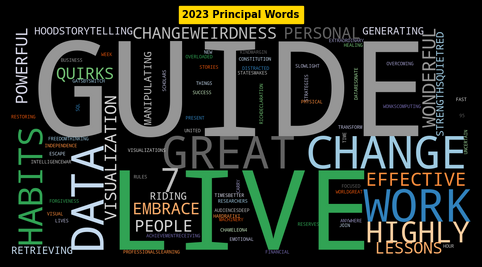

In [16]:
word_string=""

for book in BL23['Name']:
     word_string += remove_stopwords(clean_text(book.upper() + " "))

word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

word_cloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

plt.figure(figsize = (10, 3), facecolor='black')
plt.imshow(word_cloud, interpolation = 'blackman')
plt.axis('off')
plt.title("2023 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)

plt.show()

<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2024</p>

In [17]:
book_list2024 = {
    1:{'Name':"I will teach you to be rich: No guilt. No excuses. No BS. Just a 6-week program that works", 'Author':"Ramit Sethi", 'Pages':342, 'Format': "Audiobook", 'Platform':"Hoopla"}
    , 2:{'Name':"Show don't tell: How to write vivid descriptions, handle backstory, and describe your characters' emotions (Writers' Guide Series)", 'Author':"Sandra Gerth", 'Pages':114, 'Format': "Ebook", 'Platform':"Kindle"}
    , 3:{'Name':"The desciplined trader: Developing winning attitudes", 'Author':"Mark Douglas", 'Pages':236, 'Format': "Audiobook", 'Platform':"Youtube"}
    , 4:{'Name':"Ikigai: The Japanese secret to a long and happy life", 'Author':"Héctor Garcia & Francesc Miralles", 'Pages':204, 'Format': "Ebook", 'Platform':"Kindle"}
    , 5:{'Name':"Market Wizards: Interviews with top traders", 'Author':"Jack D. Schwager", 'Pages':480, 'Format': "Print", 'Platform':"Amazon"}
    , 6:{'Name':"The secret: A gripping novel of how far a mother would go for her child", 'Author':"Kathryn Hughes", 'Pages':321, 'Format': "Ebook", 'Platform':"Kindle"}
    , 7:{'Name':"The signal and the noise: Why so many predictions fail - but some don't", 'Author':"Nate Silver", 'Pages':534, 'Format': "Print", 'Platform':"QPL"}
    , 8:{'Name':"The power of your subconscious mind", 'Author':"Joseph Murphy", 'Pages':224, 'Format': "Ebook", 'Platform':"Kindle"}
    , 9:{'Name':"The Alchemist", 'Author':"Paul Coelho", 'Pages':87, 'Format': "Ebook", 'Platform':"Kindle"}
    , 10:{'Name':"The power of now: a guide to spiritual enlightenment", 'Author':"Eckhart Tolle", 'Pages':236, 'Format': "Print", 'Platform':"QPL"}
    , 11:{'Name':"Make your bed: Little things that can change your life... and maybe the world", 'Author':"William H. McRaven", 'Pages':130, 'Format': "Print", 'Platform':"QPL"}
    , 12:{'Name':"The 48 laws of power", 'Author':"Robert Greene & Richard Poe", 'Pages':864, 'Format': "Audiobook", 'Platform':"Youtube"}
    , 13:{'Name':"As a man thinketh", 'Author':"James Allen", 'Pages':32, 'Format': "Print", 'Platform':"QPL"}
                }

In [18]:
BL24 = pd.DataFrame(book_list2024).transpose()
BL24

,Name,Author,Pages,Format,Platform
1,I will teach you to be rich: No guilt. No excu...,Ramit Sethi,342,Audiobook,Hoopla
2,Show don't tell: How to write vivid descriptio...,Sandra Gerth,114,Ebook,Kindle
3,The desciplined trader: Developing winning att...,Mark Douglas,236,Audiobook,Youtube
4,Ikigai: The Japanese secret to a long and happ...,Héctor Garcia & Francesc Miralles,204,Ebook,Kindle
5,Market Wizards: Interviews with top traders,Jack D. Schwager,480,Print,Amazon
6,The secret: A gripping novel of how far a moth...,Kathryn Hughes,321,Ebook,Kindle
7,The signal and the noise: Why so many predicti...,Nate Silver,534,Print,QPL
8,The power of your subconscious mind,Joseph Murphy,224,Ebook,Kindle
9,The Alchemist,Paul Coelho,87,Ebook,Kindle
10,The power of now: a guide to spiritual enlight...,Eckhart Tolle,236,Print,QPL


In [19]:
pages_read24 = BL24['Pages'].sum()
msgbox("2024 reading stats".upper())
print(f"Number of books read in 2024: \t\t\t\t {BL24['Name'].count()} books read in 2024")
print(f"Number of pages read in 2024: \t\t\t\t {format(pages_read24, ',d')} total pages read")
print(f"Average number of pages read per month in 2024: \t {round(pages_read24/12)} pages read per month")
print(f"Average number of pages read per day in 2024: \t\t {round(pages_read24/days_in_year(2024))} pages read per day")

╔════════════════════════════╗
║     2024 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2024: 				 13 books read in 2024
Number of pages read in 2024: 				 3,804 total pages read
Average number of pages read per month in 2024: 	 317 pages read per month
Average number of pages read per day in 2024: 		 10 pages read per day


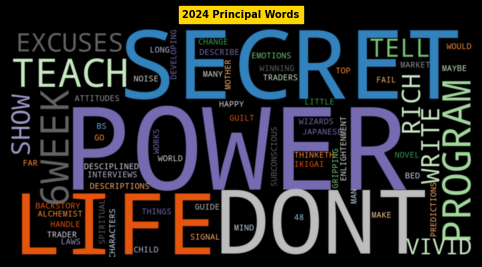

In [20]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL24['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,  # set to False to treat each word as unique
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='quadric')
'gaussian', 'spline16', 'lanczos', 'quadric', 'spline36', 'hanning', 'hamming', 'bessel','kaiser',
'nearest', 'none', 'blackman', 'bilinear', 'bicubic', 'sinc', 'catrom', 'antialiased', 'hermite', 'mitchell'
plt.axis('off')
plt.title("2024 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)
plt.show()

<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2025</p>

In [ ]:
book_list2025 = {
    1:{'Name':"Forgiving what you can't forget: Discover how to move on, make peace with painful memories, and create a life that's beautiful again", 'Author':"Lisa Terkeurst", 'Pages':270, 'Format':"Ebook" , 'Platform':"Amazon Prime"}
    , 2:{'Name':"Everything my mother taught me (Inheritance Collection Book 1)", 'Author':"Alice Hoffman", 'Pages':28, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 3:{'Name':"Can you feel this (Inheritance Collection Book 2)", 'Author':"Julie Orringer", 'Pages':36, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 4:{'Name':"The lion's den (Inheritance Collection Book 3)", 'Author':"Anthony Marra", 'Pages':27, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 5:{'Name':"Zenith man (Inheritance Collection Book 4)", 'Author':"Jennifer Haigh", 'Pages':24, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 6:{'Name':"The weddings (Inheritance Collection Book 5)", 'Author':"Alexander Chee", 'Pages':47, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 7:{'Name':"Get to the point: Sharpen your message and make your words matter", 'Author':"Joel Schwartzberg", 'Pages':129, 'Format':"Ebook", 'Platform':"Amazon Prime"}
    , 8:{'Name':"Surrounded by idiots: The four types of human behavior and how to effectively communicate with each in business (and in life)", 'Author':"Thomas Erikson", 'Pages':311, 'Format':"Audiobook", 'Platform':"Archive.com"}
    , 9:{'Name':"God's favorite", 'Author':"Brittany Green", 'Pages':31, 'Format':"Ebook", 'Platform':"Kindle"}
    , 10:{'Name':"When God whispers loudly (Terreldor Press Shorts Book 1)", 'Author':"Chris Hibbard", 'Pages':15, 'Format':"Ebook", 'Platform':"Kindle"}
    , 11:{'Name':"In God's eyes (Terreldor Press Shorts Book 2)", 'Author':"Chris Hibbard", 'Pages':25, 'Format':"Ebook", 'Platform':"Kindle"}
    , 12:{'Name':"God's worn out servants (Terreldor Press Shorts Book 3)", 'Author':"Tattie Maggard & Chris Hibbard", 'Pages':17, 'Format':"Ebook", 'Platform':"Kindle"}
    , 13:{'Name':"Snowflakes (Hush collection)", 'Author':"Ruth Ware", 'Pages':31, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 14:{'Name':"The gift (Hush collection)", 'Author':"Alison Gaylin", 'Pages':31, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 15:{'Name':"Treasure (Hush collection)", 'Author':"Oyinkan Braithwaite", 'Pages':35, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 16:{'Name':"Slow Burner (Hush collection)", 'Author':"Laura Lippman", 'Pages':38, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 17:{'Name':"Buried (Hush collection)", 'Author':"Jeffery Deaver", 'Pages':93, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 18:{'Name':"Let her be (Hush collection)", 'Author':"Lisa Unger", 'Pages':71, 'Format':"Audiobook", 'Platform':"Amazon Prime"}
    , 19:{'Name':"Think like a champion: An informal education in business and life", 'Author':"Donald J. Trump", 'Pages':226, 'Format':"Audiobook", 'Platform':"Hoopla"}
    , 20:{'Name':"Don't believe everything you think: Why your thinking is the beginning and end of suffering", 'Author':"Joseph Nguyen", 'Pages':224, 'Format':"Ebook", 'Platform':"Hoopla"}
    , 21:{'Name':"End game: An insurgency on wall street", 'Author':"Sheelah Kolhatkar", 'Pages':49, 'Format': "Ebook", 'Platform':"Amazon Prime"}
    , 22:{'Name':"The good girl: Part one", 'Author':"Tracy Reed", 'Pages':83, 'Format': "Ebook", 'Platform':"Kindle"}
    , 23:{'Name':"The unseen realm: An introduction to the realm of the supernatural", 'Author':"Francis Jonah", 'Pages':37, 'Format':"Ebook", 'Platform':"Kindle"}
    # , 24:{'Name':"", 'Author':"", 'Pages':, 'Format':"", 'Platform':""}
    # , 25:{'Name':"", 'Author':"", 'Pages':, 'Format':"", 'Platform':""}
    # , 26:{'Name':"", 'Author':"", 'Pages':, 'Format':"", 'Platform':""}
    # , 27:{'Name':"", 'Author':"", 'Pages':, 'Format':"", 'Platform':""}
    # , 28:{'Name':"", 'Author':"", 'Pages':, 'Format':"", 'Platform':""}
    # , 29:{'Name':"x", 'Author':"x", 'Pages':1772, 'Format': "x", 'Platform':""}
                }

In [40]:
BL25 = pd.DataFrame(book_list2025).transpose()
BL25

,Name,Author,Pages,Format,Platform
1,Forgiving what you can't forget: Discover how ...,Lisa Terkeurst,270,Ebook,Amazon Prime
2,Everything my mother taught me (Inheritance Co...,Alice Hoffman,28,Audiobook,Amazon Prime
3,Can you feel this (Inheritance Collection Book 2),Julie Orringer,36,Audiobook,Amazon Prime
4,The lion's den (Inheritance Collection Book 3),Anthony Marra,27,Audiobook,Amazon Prime
5,Zenith man (Inheritance Collection Book 4),Jennifer Haigh,24,Audiobook,Amazon Prime
6,The weddings (Inheritance Collection Book 5),Alexander Chee,47,Audiobook,Amazon Prime
7,Get to the point: Sharpen your message and mak...,Joel Schwartzberg,129,Ebook,Amazon Prime
8,Surrounded by idiots: The four types of human ...,Thomas Erikson,311,Audiobook,Archive.com
9,God's favorite,Brittany Green,31,Ebook,Kindle
10,When God whispers loudly (Terreldor Press Shor...,Chris Hibbard,15,Ebook,Kindle


In [41]:
pages_read25 = BL25['Pages'].sum()
msgbox("2025 reading stats".upper())
print(f"Number of books read in 2025: \t\t\t\t {BL25['Name'].count()} books read in 2025")
print(f"Number of pages read in 2025: \t\t\t\t {format(pages_read25, ',d')} total pages read")
print(f"Average number of pages read per month in 2025: \t {round(pages_read25/12)} pages read per month")
print(f"Average number of pages read per day in 2025: \t\t {round(pages_read25/days_in_year(2025))} pages read per day")

╔════════════════════════════╗
║     2025 READING STATS     ║
╚════════════════════════════╝
Number of books read in 2025: 				 23 books read in 2025
Number of pages read in 2025: 				 1,878 total pages read
Average number of pages read per month in 2025: 	 156 pages read per month
Average number of pages read per day in 2025: 		 5 pages read per day


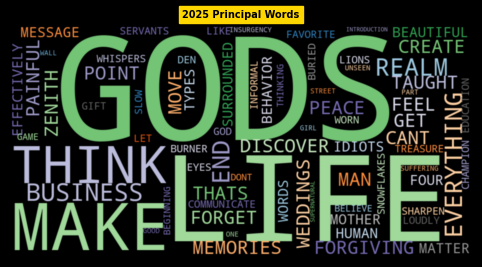

In [42]:
# Create filtered wordlist 
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in BL25['Name'])))

# Create a DataFrame with word counts
word_counts = pd.Series(word_string.split()).value_counts().reset_index()
word_counts.columns = ['Words', 'Count']
word_counts.sort_values(by=['Count', 'Words'], ascending=[False, True])

# Generate WordCloud with counts
wordcloud = WordCloud(
    background_color='black',
    scale=3,
    collocations=False,  # set to False to treat each word as unique
    colormap='tab20c',
    normalize_plurals=True
).generate_from_frequencies(word_counts.set_index('Words')['Count'].to_dict())

# Plot WordCloud
plt.figure(figsize=(10, 3), facecolor='black')
plt.imshow(wordcloud, interpolation='quadric')
'gaussian', 'spline16', 'lanczos', 'quadric', 'spline36', 'hanning', 'hamming', 'bessel','kaiser',
'nearest', 'none', 'blackman', 'bilinear', 'bicubic', 'sinc', 'catrom', 'antialiased', 'hermite', 'mitchell'
plt.axis('off')
plt.title("2025 Principal Words", fontweight='bold', color='black', backgroundcolor='gold', size=7)
plt.show()

<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Combined Assessment</p>

In [25]:
# create new column to indicate the year the book was read
for year in range(2021, 2026):
    df = globals()[f'BL{str(year)[-2:]}']
    df['Year Read'] = str(year)
print('Column added for year read')

Column added for year read


In [26]:
# Combine all book lists into a single DataFrame
comb_list = pd.concat([BL21, BL22, BL23, BL24, BL25]).sort_values(by=['Name', 'Pages', 'Year Read']).set_index(
            [pd.Index(range(1, len(BL21) + len(BL22) + len(BL23) + len(BL24) + len(BL25) + 1))])
comb_list.info()
comb_list.sample(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 1 to 83
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       83 non-null     object
 1   Author     83 non-null     object
 2   Pages      83 non-null     object
 3   Format     83 non-null     object
 4   Platform   83 non-null     object
 5   Year Read  83 non-null     object
dtypes: object(6)
memory usage: 4.0+ KB


,Name,Author,Pages,Format,Platform,Year Read
26,Ingredients: the strange chemistry of what we ...,Goerge Zaidan,299,Print,Gift,2022
38,Resonate: Present visual stories that transfor...,Nancy Duarte,336,Ebook,Kindle,2023
40,Show don't tell: How to write vivid descriptio...,Sandra Gerth,114,Ebook,Kindle,2024
80,Who moved my cheese: An A-Mazing way to deal w...,Spencer Johnson,94,Print,Ebay,2021
73,"Thinking, fast and slow",Daniel Kahneman,514,Ebook,Amazon Prime,2023
76,War is kind,Stephen Crane,42,Ebook,Kindle,2023
70,Think and grow rich,Napoleon Hill,290,Ebook,Google Drive,2021
66,The signal and the noise: Why so many predicti...,Nate Silver,534,Print,QPL,2024
64,The richest man in Babylon,George S. Clason,224,Ebook,Google Drive,2021
34,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302,Ebook,Google Drive,2021


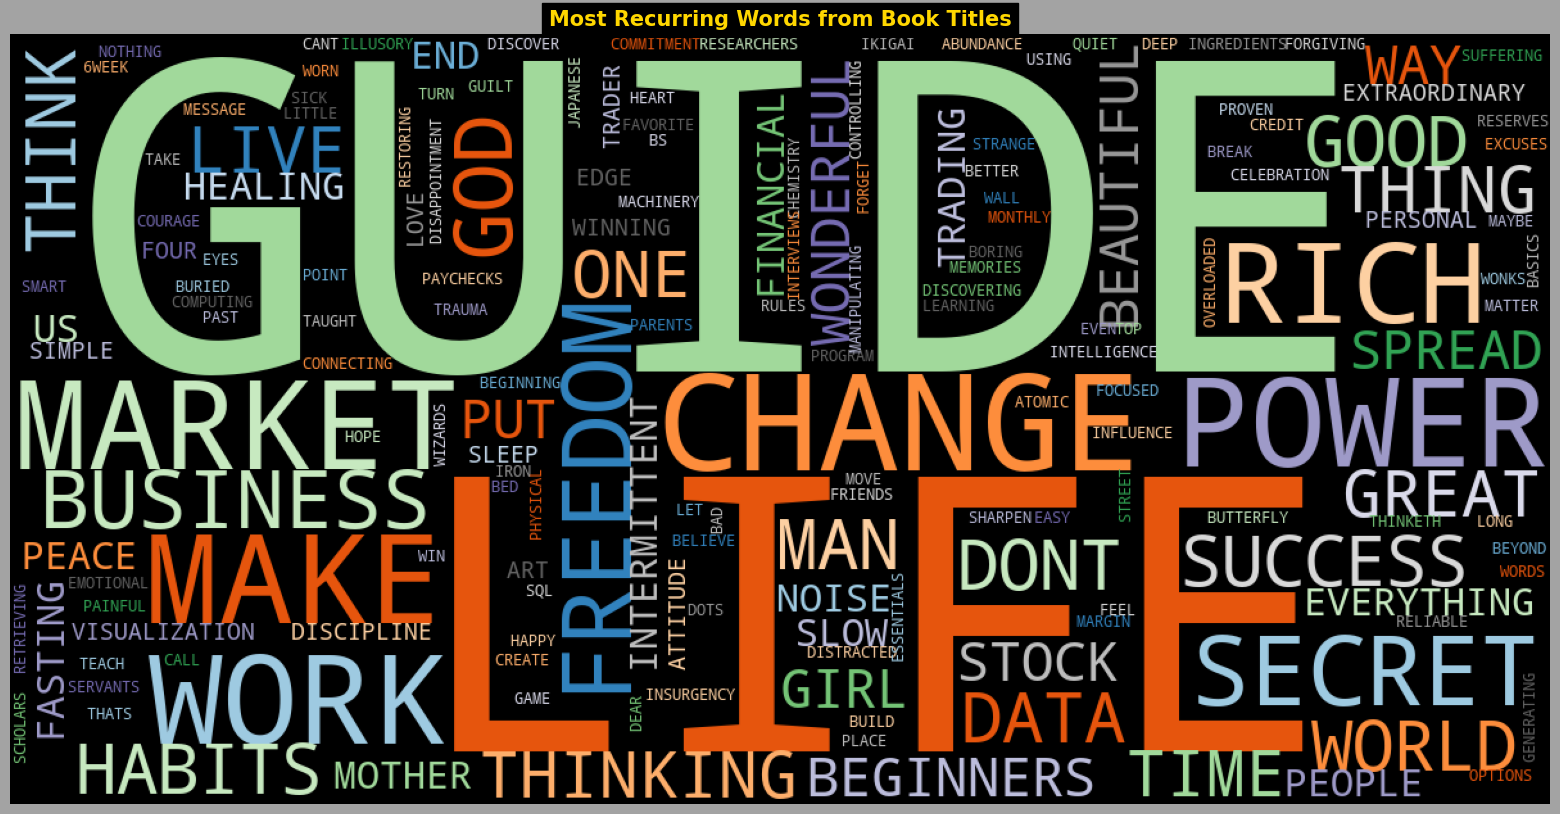

In [43]:
# Create a word cloud from the book titles
word_string = remove_stopwords(clean_text(" ".join(book.upper() for book in comb_list['Name'])))
# " ".join(book.upper() for book in comb_list['Name'])

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, colormap='tab20c', 
                       normalize_plurals=True).generate_from_text(word_string)

plt.figure(figsize = (20,10), facecolor=(0,0,0,0.36))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Most Recurring Words from Book Titles", fontweight='bold', color='gold', backgroundcolor='black', fontsize=15)

plt.show()

In [28]:
# Create a DataFrame for key words i want to highlight in my readings
KeyWords=comb_list[comb_list['Name'].str.contains(
    'power|abundance|discipline|courage|heal|habit|peace|time|invest|change|live|grow|learn|think|communicate'
    , case=False)].set_index('Year Read').style.set_caption('Key Words in Book Titles'.upper())
KeyWords

,Name,Author,Pages,Format,Platform
Year Read,,,,,
2022,Abundance beyond trauma: Discovering the courage for change and commitment to yourself,Jeannine L. Rashidi,169,Ebook,Amazon Prime
2024,As a man thinketh,James Allen,32,Print,QPL
2021,Atomic habits: an easy and proven way to build good habits and break bad ones,James Clear,298,Print,Amazon
2025,Don't believe everything you think: Why your thinking is the beginning and end of suffering,Joseph Nguyen,224,Ebook,Hoopla
2025,"Forgiving what you can't forget: Discover how to move on, make peace with painful memories, and create a life that's beautiful again",Lisa Terkeurst,270,Ebook,Amazon Prime
2021,"Heart sick: Connecting the dots between hope, disappointment and healing",Conscious Core,107,Ebook,Kindle
2022,If you had controlling parents: How to make peace with your past and take your place in the world,Dan Neuharth,274,Ebook,Kindle
2023,"Learning SQL: Generating, Manipulating and Retrieving Data",Alan Beaulieu,610,Audiobook,Hoopla
2024,Make your bed: Little things that can change your life... and maybe the world,William H. McRaven,130,Print,QPL


<a id="0"></a>
# <p style="padding:8px;background-color:#005bbb;margin:0;color:gold;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visuals</p>

In [29]:
# Save file as both CSV and database adding book length bins to create a power BI dashboard and other future uses
labels = ['Short', 'Medium', 'Long']
bins = [0, 200, 280, 1000]
comb_list['Bin'] = pd.cut(comb_list['Pages'], bins=bins, labels=labels)

conn = connect('reading_list.db')
comb_list.to_sql('reading_list', conn, if_exists='replace', index=False)
conn.close()

comb_list.to_csv('reading_list.csv', index=False)

comb_list.pivot_table(index=['Platform','Format'], columns='Bin', aggfunc={'Name': 'count', 'Pages': 'sum'}, observed=False).rename(
    columns={'Name': 'Books Read', 'Pages': 'Pages Read'})

Books Read             Pages Read         \
Bin                                   Short Medium Long      Short Medium   
Platform          Format                                                    
Amazon            Audiobook               0      0    0          0      0   
                  Ebook                   0      0    0          0      0   
                  Print                   2      4    4        180    992   
                  Research Paper          0      0    0          0      0   
Amazon Prime      Audiobook              11      0    0        461      0   
                  Ebook                   6      2    2        741    546   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   
Apple Books       Audiobook               0      1    0          0    233   
                  Ebook                   0      0    0          0      0   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   
Archive.com       Audiobook               0      0    1          0      0   
                  Ebook                   0      0    0          0      0   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   
DiscoverBooks.com Audiobook               0      0    0          0      0   
                  Ebook                   0      0    0          0      0   
                  Print                   1      0    0         52      0   
                  Research Paper          0      0    0          0      0   
Ebay              Audiobook               0      0    0          0      0   
                  Ebook                   0      0    0          0      0   
                  Print                   1      0    0         94      0   
                  Research Paper          0      0    0          0      0   
Gift              Audiobook               0      0    0          0      0   
                  Ebook                   1      0    0         46      0   
                  Print                   1      1    1         56    219   
                  Research Paper          0      0    0          0      0   
Google Drive      Audiobook               0      0    0          0      0   
                  Ebook                   0      2    6          0    430   
                  Print                   0      1    0          0    240   
                  Research Paper          2      0    0         70      0   
Hoopla            Audiobook               0      1    2          0    226   
                  Ebook                   0      1    0          0    224   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   
Kindle            Audiobook               0      0    0          0      0   
                  Ebook                  12      5    3        789   1174   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   
QPL               Audiobook               0      0    1          0      0   
                  Ebook                   0      0    0          0      0   
                  Print                   2      1    1        162    236   
                  Research Paper          0      0    0          0      0   
Youtube           Audiobook               0      2    2          0    508   
                  Ebook                   0      0    0          0      0   
                  Print                   0      0    0          0      0   
                  Research Paper          0      0    0          0      0   

                                        
Bin                               Long  
Platform          Forma

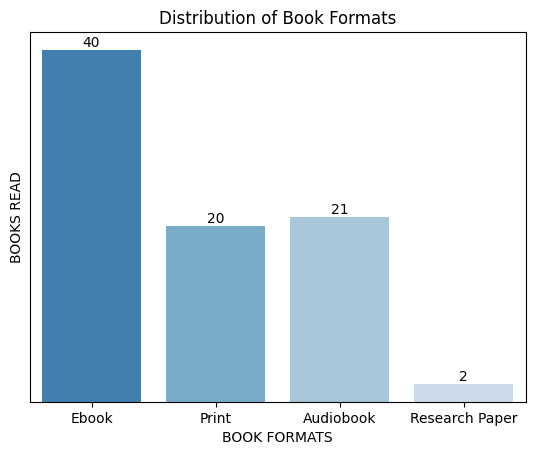

In [30]:
#Display the distribution of book formats
plt.figure()
ax = sns.countplot(data=comb_list, x='Format', palette='tab20c', saturation=0.75
              ,hue='Format', order=['Ebook', 'Print', 'Audiobook', 'Research Paper'])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height(), int(p.get_height())
            , ha='center', va='bottom')
plt.gca().tick_params(labelleft=False, left=False)
plt.title('Distribution of Book Formats')
plt.xlabel('Book Formats'.upper())
plt.ylabel('Books Read'.upper())
plt.show()

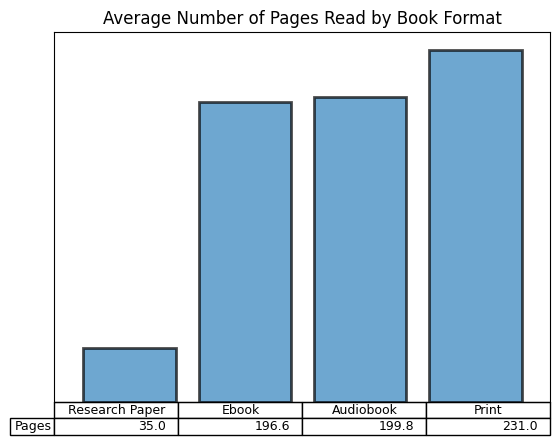

In [31]:
# Calculate the average number of pages for each book format
avg_pages_by_format = comb_list.groupby('Format')['Pages'
                        ].mean().astype('float16').sort_values()

avg_pages_by_format.plot(kind='bar', title='Average Number of Pages Read by Book Format', 
                         rot=0, fontsize=12, edgecolor='black', linewidth=2, alpha=0.7, 
                         width=0.8, align='center', position=0.5, table=True,
                         colormap='tab20c')
plt.xlabel('')
ax = plt.gca()
ax.tick_params(bottom=False, labelbottom=False, labelleft=False, left=False)

plt.show()

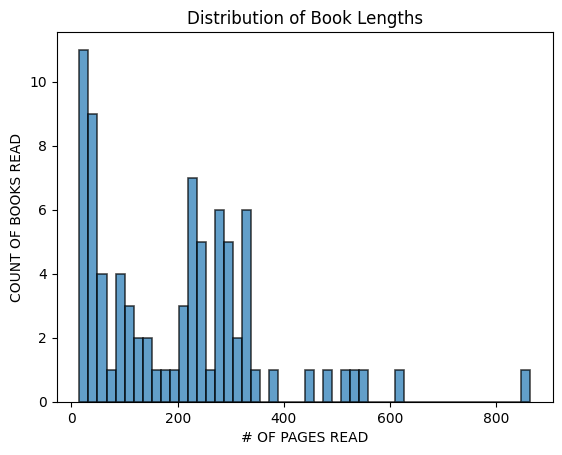

In [32]:
# Plotting a histogram of book lengths (number of pages)
plt.hist(comb_list['Pages'], bins=50, edgecolor='black', linewidth=1.2, alpha=0.7, align='mid')
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='center')
plt.title('Distribution of Book Lengths')
plt.xlabel('# of Pages Read'.upper())
plt.ylabel('Count of Books Read'.upper())

plt.show()

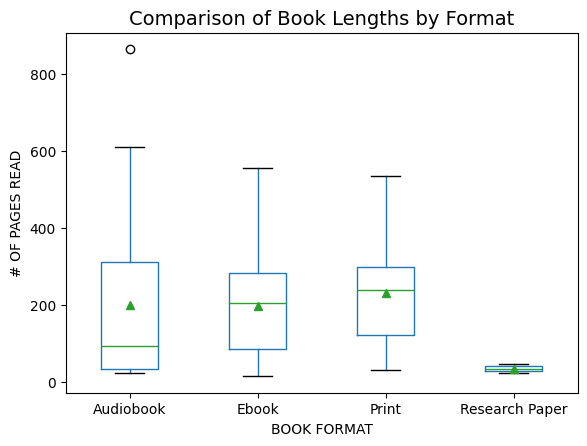

In [33]:
# Creating a box plot to compare book lengths across formats
comb_list.boxplot(column='Pages', by='Format', showfliers=True, showmeans=True, meanline=False, grid=False)
plt.title('Comparison of Book Lengths by Format', loc='center', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), horizontalalignment='center')
plt.xlabel('Book Format'.upper())
plt.ylabel('# of Pages Read'.upper())
plt.suptitle('')

plt.show()

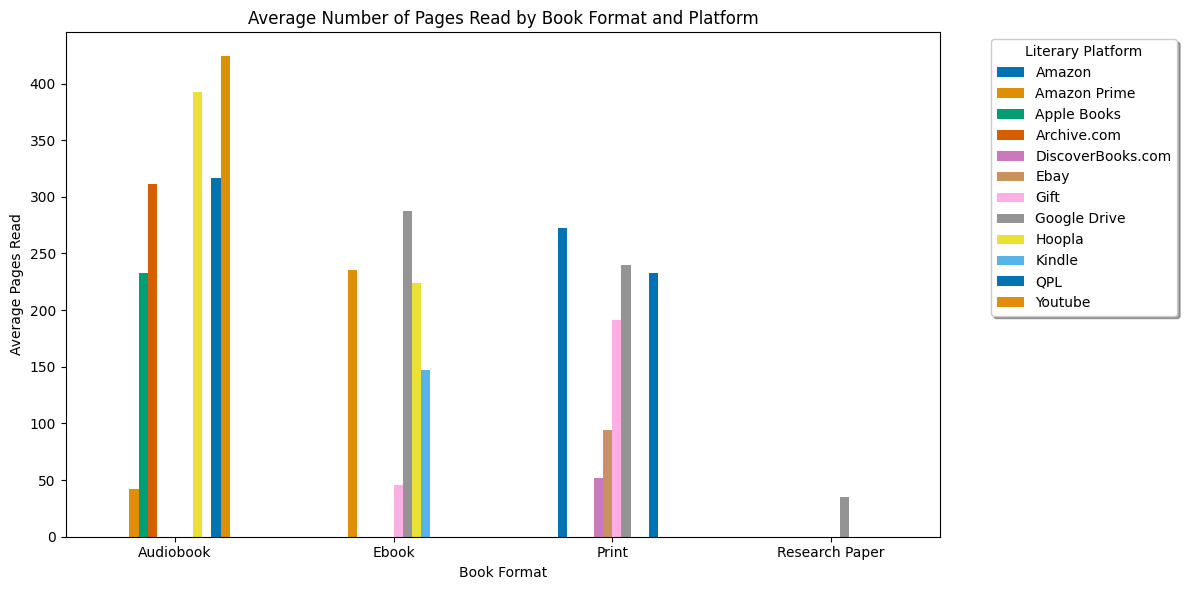

In [34]:
# Prepare data for the stacked bar chart
stacked_data = comb_list.groupby(['Format', 'Platform'])['Pages'].mean().unstack()

# Create a stacked bar chart
stacked_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=sns.color_palette("colorblind", len(stacked_data.columns)))

plt.title('Average Number of Pages Read by Book Format and Platform')
plt.xlabel('Book Format')
plt.xticks(rotation=0)
plt.ylabel('Average Pages Read')
plt.legend(title='Literary Platform', bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)
plt.tight_layout()
plt.show()

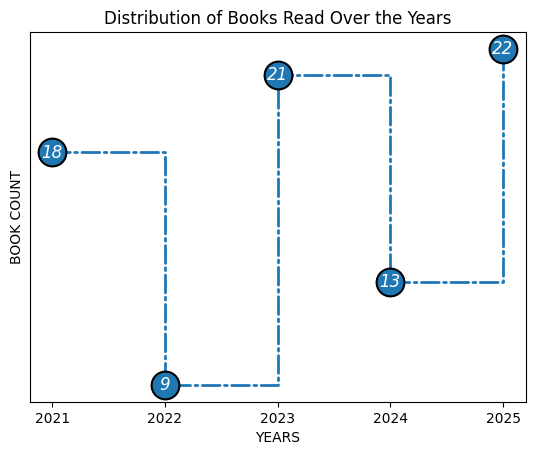

In [35]:
# Count the occurrences of books read by year
books_by_year = comb_list['Year Read'].value_counts().sort_index()

# Plot the distribution of books read over the years
plt.plot(books_by_year.index, books_by_year.values, marker='o', 
         linestyle='-.', linewidth=2, markeredgecolor='black', 
         markersize=20, markeredgewidth=1.5, antialiased=True,
         markerfacecoloralt='black', dash_capstyle='round', 
         dash_joinstyle='round', solid_capstyle='round',
         solid_joinstyle='round',  snap=True, drawstyle='steps-post')

# Add data labels to the data points
for x, y in zip(books_by_year.index, books_by_year.values):
    plt.text(x, y, str(y), fontsize=12, fontstyle='oblique'
             , ha='center', va='center', color='white')

plt.title('Distribution of Books Read Over the Years')
plt.xlabel('Years'.upper())
plt.ylabel('Book Count'.upper())
plt.yticks([])

plt.show()

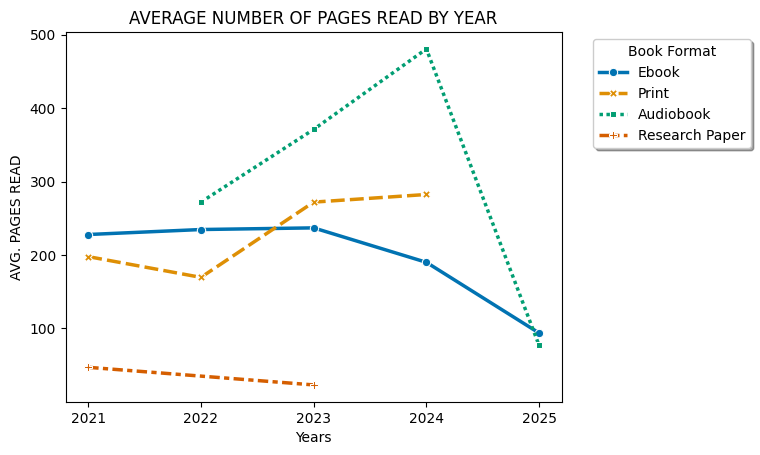

In [36]:
# Ensure 'Year Read' column is of type integer
comb_list['Year Read'] = comb_list['Year Read'].astype(int)

# Plot the average number of pages by year
plt.figure()
sns.lineplot(data=comb_list, x='Year Read', y='Pages', hue='Format',
             palette='colorblind', linewidth=2.5, style='Format',
             markers=True, legend='full', estimator='mean', errorbar=None)
plt.xlabel('Years')
plt.ylabel('AVG. Pages Read'.upper())
plt.title('Average Number of Pages Read by Year'.upper())
plt.legend(title='Book Format', bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)

# Set x-axis limits and ticks by years available in data table
unique_years = sorted(comb_list['Year Read'].unique())
plt.xticks(unique_years)

plt.show()

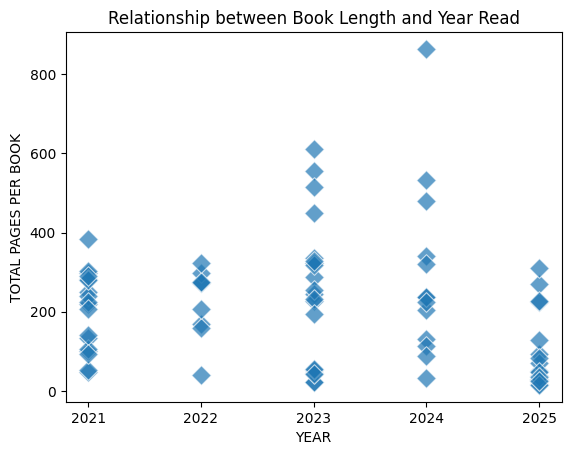

In [37]:
# Creating a scatter plot to visualize the relationship between book length and reading time
sns.scatterplot(data=comb_list, y='Pages', x='Year Read',
             alpha=0.7, edgecolor='white', s=100, marker='D')
plt.title('Relationship between Book Length and Year Read')
plt.ylabel('Total Pages per Book'.upper())
plt.xlabel('Year'.upper())
plt.xticks(unique_years)

plt.show()